## Домашнее задание к занятию «Оценка точности модели, переобучение, регуляризация» (обновленное)

### Задание

<b>Цель:</b><br> закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall. <p>
<b>Описание задания:</b><br>
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.<p>

<b>Этапы работы:</b><p>

1. Преобразуйте данные:<br>
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;<br>
b. закодируйте категориальные переменные числовыми значениями по необходимости.
2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.
5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.
9. <b>Сформулируйте выводы по проделанной работе:</b><br>
a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?<br>
b. *может ли ROC-кривая проходить ниже диагонали?<p>

<b>Результат:</b>
- проведена оценка качества модели классификации;
- реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки sklearn.<p>

<b>Форма выполнения:</b>
- ссылка на Jupyter Notebook, загруженный на GitHub;
- ссылка на Google Colab;
- файл с расширением .ipynb.<p>

   
<b>Инструменты:</b>
- Jupyter Notebook/Google Colab;
- GitHub;
- файл athletes.csv<p>

<b>Срок выполнения:</b> дедлайн приема решений на проверку
    
<b><i>Рекомендации к выполнению: </b></i><br>
- Убедитесь, что на графике ROC-кривой присутствует диагональная линия, начинающаяся в точке (0;0) и заканчивающаяся в точке (1;1).
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [4]:
data.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


> Из таблицы видно, что есть пропуски в колонках dob (date of birthday), height, weight. Проверим пропуски, для того что бы принять решения что с ними делать.

In [6]:
# Выведем все уникальные знчания:
for col in data:
 print(f'{col}:  {data[col].unique()}')

# Так же проверим данные на дубликаты, что бы исключить повторы

print(data[data.duplicated()])


id:  [736041664 532037425 435962603 ...  88361042 900065925 711404576]
name:  ['A Jesus Garcia' 'A Lam Shin' 'Aaron Brown' ... 'di Xiao'
 'le Quoc Toan Tran' 'le Roux Hamman']
nationality:  ['ESP' 'KOR' 'CAN' 'MDA' 'NZL' 'AUS' 'USA' 'ETH' 'BRN' 'IOA' 'GBR' 'UZB'
 'RSA' 'EGY' 'MAR' 'QAT' 'SUD' 'ALG' 'DEN' 'NED' 'DJI' 'SEN' 'CMR' 'ITA'
 'NIG' 'SWE' 'GHA' 'AFG' 'AZE' 'KSA' 'BAN' 'NGR' 'RUS' 'IND' 'HUN' 'KAZ'
 'BDI' 'ERI' 'POL' 'BRA' 'GEO' 'CZE' 'SEY' 'GAM' 'LTU' 'IRI' 'ROU' 'CUB'
 'SLO' 'BAH' 'ARG' 'PUR' 'FRA' 'RWA' 'TOG' 'MDV' 'TUN' 'ISR' 'LAT' 'JOR'
 'MAS' 'LIB' 'LBA' 'PLE' 'IRQ' 'TUR' 'VEN' 'JPN' 'TPE' 'KGZ' 'CHN' 'MEX'
 'GRE' 'IRL' 'JAM' 'SUI' 'BAR' 'HON' 'ANG' 'GER' 'COL' 'URU' 'MNE' 'SRB'
 'BUL' 'FIN' 'UKR' 'BLR' 'SMR' 'COK' 'SAM' 'AUT' 'BEL' 'KEN' 'SVK' 'POR'
 'ECU' 'UAE' 'NAM' 'GUY' 'EST' 'SKN' 'ARU' 'PAN' 'PER' 'TAN' 'FIJ' 'GUI'
 'NOR' 'ARM' 'THA' 'SIN' 'TKM' 'CRO' 'BIH' 'TGA' 'MAW' 'DOM' 'GUA' 'MKD'
 'TJK' 'CYP' 'CHI' 'MLT' 'ZIM' 'TTO' 'CRC' 'BOL' 'BUR' 'ISL' 'HAI' 'ROT'
 'MGL' 

1. Проверим пропуски даты рождения

In [7]:
invalid_dates = pd.to_datetime(data['dob'], format='%m/%d/%y', errors='coerce').isna()
invalid_dates = data[invalid_dates]

In [8]:
invalid_dates

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaN,NaN,NaN,sailing,0,0,0


> Как видимо из данных, по ID 663676373 данных не хватает в нескольких важных колонках и эта запись нам ничего не даст, т.е. мы можем ее спокойно удалить

In [9]:
data = data.drop(data[data['id'] == invalid_dates['id'].iloc[0]].index)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11537 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11537 non-null  int64  
 1   name         11537 non-null  object 
 2   nationality  11537 non-null  object 
 3   sex          11537 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11537 non-null  object 
 8   gold         11537 non-null  int64  
 9   silver       11537 non-null  int64  
 10  bronze       11537 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB


In [10]:
# data[data.isnull().any(1)]
data.describe()

,id,height,weight,gold,silver,bronze
count,1.153700e+04,11208.000000,10879.000000,11537.000000,11537.000000,11537.000000
mean,4.999743e+08,1.766282,72.068205,0.057727,0.056774,0.061021
std,2.908734e+08,0.112719,16.177334,0.255920,0.239157,0.243330
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450891e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.001905e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.540254e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [11]:
# Выведем в процентном соотношении ко всем данным в каждой колонке - Nan, проверим, как они влияют на данные и что с этим можно сделать
data.apply(lambda x: x.isna().sum()/data['name'].count()*100)

id             0.000000
name           0.000000
nationality    0.000000
sex            0.000000
dob            0.000000
height         2.851695
weight         5.703389
sport          0.000000
gold           0.000000
silver         0.000000
bronze         0.000000
dtype: float64

> По полученным данным получается, что при удалении строк с NAN мы потеряем данныe, проверим на сколько
> Для дальнейшей работы я решил не использовать загруженный ДФ, а сделать копию, что бы можно
было бы сравнить данные после модификации

In [12]:
data_test = data.copy()

In [13]:
# удаляем строки с пропусками
data_test = data_test[~(data_test['height'].isna())]
data_test = data_test[~(data_test['weight'].isna())]


In [14]:
print(f" После удаления строк со всеми пропусками, мы потеряли: {100 - data_test['name'].count()*100 / data['name'].count():.2f}% данных")

 После удаления строк со всеми пропусками, мы потеряли: 5.89% данных


> Потеря 5,89% по моему мнению много, далее решил использовать замену по mode, но учитывая, что как правило при гендерном различии различаются и вес и рост, то я разобью ДФ на два по полу и потом после замены соберу ДФ из двух

In [15]:
# создадим еще одну копию для male и вторую для female

male = data.copy() # создаем копию исходного DataFrame
male.drop(male[male['sex'] == 'female'].index, inplace=True) # удаляем строки, где значение в столбце 'sex' равно 'female'

female = data.copy() # создаем копию исходного DataFrame
female.drop(female[female['sex'] == 'male'].index, inplace=True) # удаляем строки, где значение в столбце 'sex' равно 'male'


In [16]:
# Замена NaN height в ДФ-ах
mode_h_male = male['height'].mode()[0]
male['height'] = male['height'].fillna(mode_h_male)

mode_h_female = female['height'].mode()[0]
female['height'] = female['height'].fillna(mode_h_female)

# Замена NaN weight в ДФ-ах  
mode_w_male = male['weight'].mode()[0]
male['weight'] = male['weight'].fillna(mode_w_male)

mode_w_female = female['weight'].mode()[0]
female['weight'] = female['weight'].fillna(mode_w_female)

In [17]:
athletes = pd.concat([female, male], ignore_index=True)

In [18]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11537 non-null  int64  
 1   name         11537 non-null  object 
 2   nationality  11537 non-null  object 
 3   sex          11537 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11537 non-null  float64
 6   weight       11537 non-null  float64
 7   sport        11537 non-null  object 
 8   gold         11537 non-null  int64  
 9   silver       11537 non-null  int64  
 10  bronze       11537 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.6+ KB


In [19]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153700e+04,11537.000000,11537.000000,11537.000000,11537.000000,11537.000000
mean,4.999743e+08,1.766039,71.743261,0.057727,0.056774,0.061021
std,2.908734e+08,0.111422,15.819526,0.255920,0.239157,0.243330
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450891e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.001905e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.540254e+08,1.840000,80.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


> Так как мы соединили два дата фрейма, то у нас сложилась ситуация, когда получилась сортировка по признаку гендерства. <br>
В дата фрейме нет временных или дргих признаков, которые мы можем использовать для сортировки. Я решил сделать хаотичную сортировку строк c помощью shuffle

In [20]:
from sklearn.utils import shuffle

In [21]:
athletes = shuffle(athletes).reset_index(drop=True)

> Закодируем категориальные переменные числовыми значениями

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lei = LabelEncoder()
lei.fit(athletes['sex'])
athletes['sex']=lei.transform(athletes['sex'])
athletes

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,950445859,Florian Skilang Temengil,PLW,1,11/4/86,1.53,125.0,wrestling,0,0,0
1,101781750,Abdulkadir Abdullayev,AZE,1,7/17/88,1.88,70.0,boxing,0,0,0
2,81861765,Frank Aniello Molinaro,USA,1,12/27/88,1.68,68.0,wrestling,0,0,0
3,469894756,Clemens Rapp,GER,1,7/14/89,1.93,85.0,aquatics,0,0,0
4,566924681,Tim Agaba,RSA,1,7/23/89,1.93,104.0,rugby sevens,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
11532,682664911,Ratu Nakalevu,FIJ,1,3/7/94,1.70,73.0,football,0,0,0
11533,463296329,Oliver Dingley,IRL,1,11/24/92,1.63,60.0,aquatics,0,0,0
11534,713630406,Luiz Felipe Outerelo,BRA,1,12/11/91,1.81,82.0,aquatics,0,0,0
11535,101248331,Lee-Ann Persse,RSA,0,11/20/88,1.81,74.0,rowing,0,0,0


> Выделим возраст в отдельный столбец

In [24]:
from dateutil.relativedelta import relativedelta
import datetime


# преобразовываем в формат datetime
athletes['dob_tf'] = pd.to_datetime(athletes['dob'], format='%m/%d/%y')

# вычисляем возраст в годах на текущую дату
now = datetime.datetime.now()
athletes['age'] = athletes['dob_tf'].apply(lambda x: relativedelta(now, x).years)
athletes.loc[athletes['age'] < 0 , 'age'] += 100
athletes = athletes.drop(['dob_tf', 'dob'], axis=1)
athletes.head()

,id,name,nationality,sex,height,weight,sport,gold,silver,bronze,age
0,950445859,Florian Skilang Temengil,PLW,1,1.53,125.0,wrestling,0,0,0,36
1,101781750,Abdulkadir Abdullayev,AZE,1,1.88,70.0,boxing,0,0,0,34
2,81861765,Frank Aniello Molinaro,USA,1,1.68,68.0,wrestling,0,0,0,34
3,469894756,Clemens Rapp,GER,1,1.93,85.0,aquatics,0,0,0,33
4,566924681,Tim Agaba,RSA,1,1.93,104.0,rugby sevens,0,0,1,33


> Создадим категории для возрастов: до 30, от 30-40, 40 - 50, старше 50 и запишим в отдельный столбец категории 0, 1, 2, 3

In [25]:

# Определение функции для категоризации возраста
def categorize_age(age):
    if age < 30:
        return 'less_30_yo'
    elif age <= 40:
        return '30-40_yo'
    elif age <= 50:
        return '40-50_yo'
    else:
        return 'above_50_yo'

# Создание столбца категорий возраста
athletes['age_category'] = athletes['age'].apply(categorize_age)
athletes = athletes.drop('age', axis=1)


> преобразуем в категориальные переменные

In [26]:
# Сначала выберем признаки для начала работы
selectedColumns = athletes[['id', 'nationality', 'sex', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze', 'age_category']]

In [27]:
# переведем их в значения 0 и 1, добавив столбцы с соответствующими названиями
athletes = pd.get_dummies(selectedColumns)
athletes

,id,sex,height,weight,gold,silver,bronze,nationality_AFG,nationality_ALB,nationality_ALG,...,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling,age_category_30-40_yo,age_category_40-50_yo,age_category_above_50_yo,age_category_less_30_yo
0,950445859,1,1.53,125.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,101781750,1,1.88,70.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,81861765,1,1.68,68.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,469894756,1,1.93,85.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,566924681,1,1.93,104.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,682664911,1,1.70,73.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11533,463296329,1,1.63,60.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11534,713630406,1,1.81,82.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11535,101248331,0,1.81,74.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


> Строим модель

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler


In [29]:
# Сначала выберем признаки для начала работы
selectedColumns = list(filter(lambda i: i != 'sex', athletes.columns))
X = athletes[selectedColumns]
X.head()

,id,height,weight,gold,silver,bronze,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,...,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling,age_category_30-40_yo,age_category_40-50_yo,age_category_above_50_yo,age_category_less_30_yo
0,950445859,1.53,125.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,101781750,1.88,70.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,81861765,1.68,68.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,469894756,1.93,85.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,566924681,1.93,104.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
y = athletes['sex']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: sex, dtype: int32

In [31]:
# Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [33]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [34]:
model.score(X_test, y_test)

0.8266897746967071

In [35]:
predictions = model.predict_proba(X_test)
predictions

array([[0.06196332, 0.93803668],
       [0.9934126 , 0.0065874 ],
       [0.28480229, 0.71519771],
       ...,
       [0.48251549, 0.51748451],
       [0.15192093, 0.84807907],
       [0.11892396, 0.88107604]])

> Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

In [36]:
from sklearn.metrics import roc_curve

In [37]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

In [38]:
from matplotlib import pyplot as plt

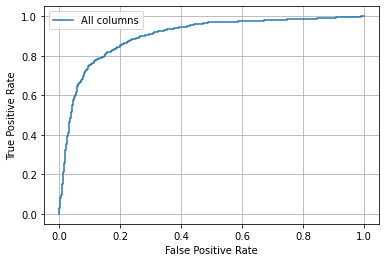

In [39]:
plt.plot(fpr, tpr, label = 'All columns' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.grid()
plt.show()


> Значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [40]:
from sklearn.metrics import roc_auc_score

In [41]:
roc_auc_score(y_test, predictions[:, 1])

0.901303555074578

> Подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [55]:
tpr1 = []
fpr1 = []
prec = []
for threshold in np.arange(0,1,0.1):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    y_pred = model.predict_proba( X_test )
    for predicted_prob, actual in zip( y_pred[:,1], y_test ):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0
        
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr1.append(tp/(tp+fn))
    fpr1.append(fp/(fp+tn))
    prec.append(tp / (tp + fp))

In [43]:
pred = model.predict(X_test)

In [44]:
tp, fp, fn, tn

(596, 36, 655, 1021)

In [45]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7006065857885615

In [46]:
precision = tp / (tp + fp)
precision

0.9430379746835443

In [47]:
recall = tp / (tp + fn)
recall

0.47641886490807356

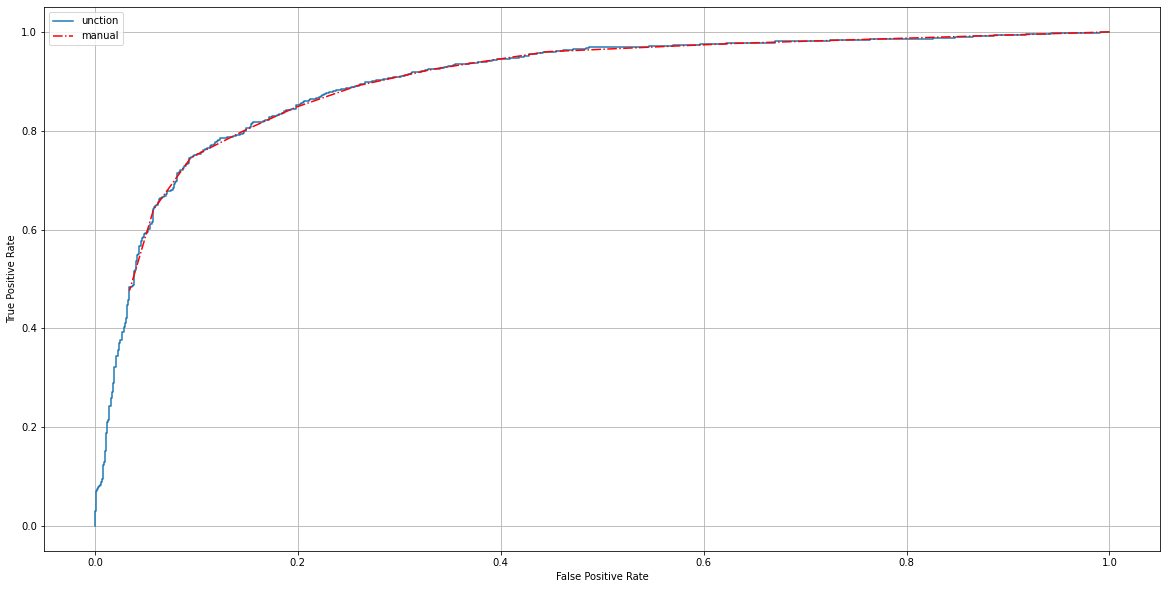

In [48]:
plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, label = 'unction',  )
plt.plot(fpr1, tpr1, label = 'manual', linestyle = 'dashdot', color = 'red' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.grid()
plt.show()


<b><i>Вывод:</b></i> У меня получилось, что метрики совпали, так что наверное лучше использовать встроенные функции.
В целом модель получалась не плохая, площадь практически идеальная.

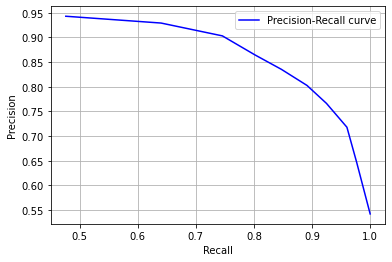

In [57]:
plt.plot(tpr1, prec, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')


plt.legend( loc = 0 )
plt.grid()
plt.show()

Ответы на вопросы: <br>
    ROC-кривая не может проходить ниже диагонали, так как это будет означать, что классификатор работает хуже, чем случайный выбор. Диагональ соответствует случайному угадыванию, когда AUC равен 0,5. Если ROC-кривая проходит ниже диагонали, то AUC будет меньше 0,5, что означает, что классификатор работает хуже, чем случайный выбор